### Derivation of Rodrigues' Rotation Formula
Assume rotation-axis $\hat{u}$ and a vector $\vec{v}$ for rotation exist. The geometrical operation at hand is the rotation of $\vec{v}$ for an angle of $\theta$ around $\hat{u}$. The first mathematical identity we need is the **projection** of $\vec{v}$ on $\hat{u}$, expressed as $v_{\parallel}$: 

$\vec{v}_{\parallel} = \dfrac{\vec{v} \cdot \hat{u}}{\hat{u} \cdot \hat{u}} \hat{u} = \dfrac{1}{\hat{u} \cdot \hat{u}}\hat{u}(\hat{u} \cdot \vec{v}) \rightarrow \text{Eq. 1}$

We can replace vector-dot products in Eq. 1 with matrix multiplication operators as follows:

$\vec{v}_{\parallel} = \dfrac{1}{\hat{u}^T\hat{u}}\hat{u}(\hat{u}^T \vec{v}) = (\hat{u}\hat{u}^T) \vec{v} \rightarrow \text{Eq. 2}$

The second concept to introduce is the **rejection** of $\vec{v}$ from $\hat{u}$, which is $\vec{v}_{\perp} = \vec{v} - \vec{v}_{\parallel}$. In terms of Eq.2:

$\vec{v}_{\perp} = (I - \hat{u}\hat{u}^T)\vec{v} \rightarrow \text{Eq. 3}$

At this point, we will adhere to the concept of rotation. That is, any vector that is parallel to the rotation axis remains unchanged. It is clear that $\vec{v}_{\parallel}$ is parallel to rotation axis $\hat{u}$ by construction. So only the vector rejection $\vec{v}_{\perp}$ changes under rotation. Let's call this new vector $\overline{\vec{v}_{\perp}}$

In [2]:
def adjust_limits(ax, n = None):
	if n is None:
		val = 5
	else:
		val = n
	ax.axes.set_xlim3d(left=-val, right=val) 
	ax.axes.set_ylim3d(bottom=-val, top=val) 
	ax.axes.set_zlim3d(bottom=-val, top=val)

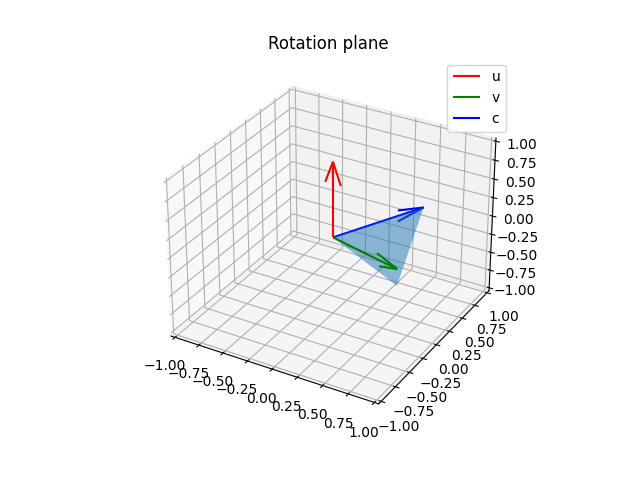

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
u = np.array([0, 0, 1])
v = np.array([4, -2, 1])
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d', autoscale_on=True)
adjust_limits(ax, 1)
v_ = v / np.linalg.norm(v)
c = np.cross(u, v_)
plt.quiver(0, 0, 0, u[0], u[1], u[2], color='red', label='u')
plt.quiver(0, 0, 0, v_[0], v_[1], v_[2], color='green', label='v')
plt.quiver(0, 0, 0, c[0], c[1], c[2], color='blue', label='c')

x = np.array([[0, 0], [v_[0], c[0]]])
y = np.array([[0, 0], [v_[1], c[1]]])
z = np.array([[0, 0], [0, 0]])

ax.plot_surface(x, y, z, alpha=0.5)
plt.legend()
plt.title('Rotation plane')
plt.show()

In order to apply the rotation to $\vec{v}_{\perp}$ in the blue-colored plane, we need to create its orthogonal vector in that plane, which is $\vec{c} = \hat{u} \times \vec{v}$. Mind that $\vec{v}_{\perp}$ is not shown in the plot, but you could think of it as the projection of $\vec{v}$ on the blue-colored plane. Having this two identities, we can write the following new equation, which is the planar rotation formula of a vector in terms of its components:

$\vec{v}_{\perp}^R = \vec{v}_{\perp}\cdot cos(\theta) + c\cdot sin(\theta) = (I - \hat{u}\hat{u}^T)\vec{v} \cdot cos(\theta) + (\hat{u} \times \vec{v})\cdot sin(\theta)  \rightarrow \text{Eq. 4}$

The rotated vector is finally defined as:

$\vec{v}^R = \vec{v}_{\parallel} + \vec{v}_{\perp}^R = (\hat{u}\hat{u}^T) \vec{v} + (I - \hat{u}\hat{u}^T)\vec{v} \cdot cos(\theta) + (\hat{u} \times \vec{v}) sin(\theta) = \vec{v}cos(\theta) + (1- cos(\theta))\hat{u}\hat{u}^T\vec{v} + (\hat{u} \times \vec{v})sin(\theta) \rightarrow \text{Eq. 5}$

$\vec{v}^R = \vec{v}cos(\theta) + (1 - cos(\theta))\vec{v}_{\parallel} + (\hat{u} \times \vec{v}) sin(\theta) = \vec{v}cos(\theta) +  (1 - cos(\theta))(\vec{v} - \vec{v}_{\perp}) +  (\hat{u} \times \vec{v}) sin(\theta)  \rightarrow \text{Eq. 6}$

Here, we need to recall a fundamental identity -- triple cross product rule:

$a \times (b \times c) = (a \cdot c)\cdot b - (a \cdot b)c$

When we respectively replace $a=\hat{u}, b=\hat{u}$ and $c=\vec{v}$ into this equation, it becomes:

$\hat{u} \times (\hat{u} \times \vec{v}) = (\hat{u}\cdot \vec{v})\cdot \hat{u} - (\hat{u}\cdot\hat{u})\cdot \vec{v} = (\hat{u}\cdot \vec{v})\cdot \hat{u} - \vec{v} = \hat{u}\hat{u}^T\vec{v} - \vec{v} = - \vec{v}_{\perp}$, where $\parallel\hat{u}\parallel = 1$.

Replacing $\vec{v}_{\perp}$ in Eq.6:

$\vec{v}^R = \vec{v}cos(\theta) +  (1 - cos(\theta))(\vec{v} + \hat{u} \times (\hat{u} \times \vec{v})) +  (\hat{u} \times \vec{v}) sin(\theta) \rightarrow \text{Eq. 7}$

In order to get rid of cross product between vectors, we utilize the skew-symmetric matrix of $\hat{u}_{\times}$, which is the matrix form of cross-product.

$\vec{v}^R = \vec{v}cos(\theta) +  (1 - cos(\theta))(\vec{v} + [\hat{u}_{\times}][\hat{u}_{\times}] \vec{v})) +  [\hat{u}_{\times}] \vec{v} sin(\theta) = \vec{v}cos(\theta) - \vec{v}cos(\theta) + \vec{v} +  (1 - cos(\theta))[\hat{u}_{\times}]^2 \vec{v} + [\hat{u}_{\times}] \vec{v} sin(\theta)$

$\vec{v}^R = (I + (1 - cos(\theta)) [\hat{u}_{\times}]^2 + sin(\theta)[\hat{u}_{\times}]) \vec{v} \rightarrow \text{Eq. 8}$

We have eventually derived the Rodrigues' rotation formula that computes the 3x3 rotation matrix from an angle-axis ($\theta, \hat{u}$) representation, such that $\vec{v}$ is rotated to be $\vec{v}^R$.

---

$ R = I + sin(\theta)[\hat{u}_{\times}] + (1 - cos(\theta)) [\hat{u}_{\times}]^2 \blacksquare$